# VÍ DỤ 1

Khai báo thư viện:

In [1]:
import numpy as np # Thư viện tính toán đại số
import pandas as pd # Thư viện xử lý dữ liệu
import seaborn as sns # Thư viện vẽ đồ thị
import itertools # Thư viện hỗ trợ vòng lặp
from scipy import linalg
import matplotlib.pyplot as plt # Thư viện vẽ đồ thị
import matplotlib.patheffects as PathEffects # Thư viện vẽ đồ thị
from matplotlib.patches import Ellipse
from sklearn.preprocessing import MinMaxScaler # Thư viện chuẩn hoá dữ liệu
from sklearn.mixture import GaussianMixture # Thư viện chứa model Gaussian Mixture
# Thư viện chứa model Gaussian Mixture

(i) Đọc dữ liệu vào, chuẩn hóa (chú ý trong phần lý thuyết ta đã biết nếu kỳ vọng của các phân bố
Gaussian là 0 thì tính toán sẽ tốt hơn); Ở trong code ta sẽ in ra một số thông tin của dữ liệu để
xem đọc có đúng không.

In [106]:
data = pd.read_csv("shopping-data.csv",header=0,index_col=0)
print(data.shape)
data.head()
# Lấy ra thu nhập va điểm shopping
X = data.iloc[:, 2:4].values

# Chuẩn hoá dữ liệu
std = MinMaxScaler()
X_std = std.fit_transform(X)
print(X_std.shape)

(200, 4)
(200, 2)


(ii) Khởi tạo đối tượng của lớp mô hình trộn Gaussian thông qua hàm dựng
gm = GaussianMixture(n_components=K, covariance_type='full', random_state=0)
Ở đây số cụm được chia sẽ là n_component = K

(iii) Sau đó ta khớp dữ liệu của ta bằng đối tượng mô hình vừa tạo:
gm. fit(X_DATA)

In [107]:
# Khởi tạo đối tượng mô hình GaussianMixture
gm = GaussianMixture(n_components=5,covariance_type='full',random_state=0)

# Khớp dữ liệu với mô hình
gm.fit(X_std)
print('means: \n', gm.means_)
print('covariances: \n ', gm.covariances_)

means: 
 [[0.60502531 0.15433196]
 [0.33368985 0.49394756]
 [0.58393969 0.82673863]
 [0.0829305  0.80743088]
 [0.09861098 0.21597752]]
covariances: 
  [[[ 0.01818446  0.00433814]
  [ 0.00433814  0.00873064]]

 [[ 0.00613567 -0.00231927]
  [-0.00231927  0.0051635 ]]

 [[ 0.01808598 -0.00031096]
  [-0.00031096  0.0091568 ]]

 [[ 0.00337483 -0.0001437 ]
  [-0.0001437   0.01026088]]

 [[ 0.00453005  0.00255303]
  [ 0.00255303  0.01918353]]]


(v) Ở trong code dưới đây, chúng ta bổ sung thêm phần tìm xem K (số cụm nên dùng để chia dữ liệu)
bao nhiêu là hợp lý nhất. Các làm của chúng ta ở đây đơn giản chỉ là thử với một dãy các giá trị
số cụm, giá trị nào cho kết quả tốt nhất (trong số đó) thì sử dụng.

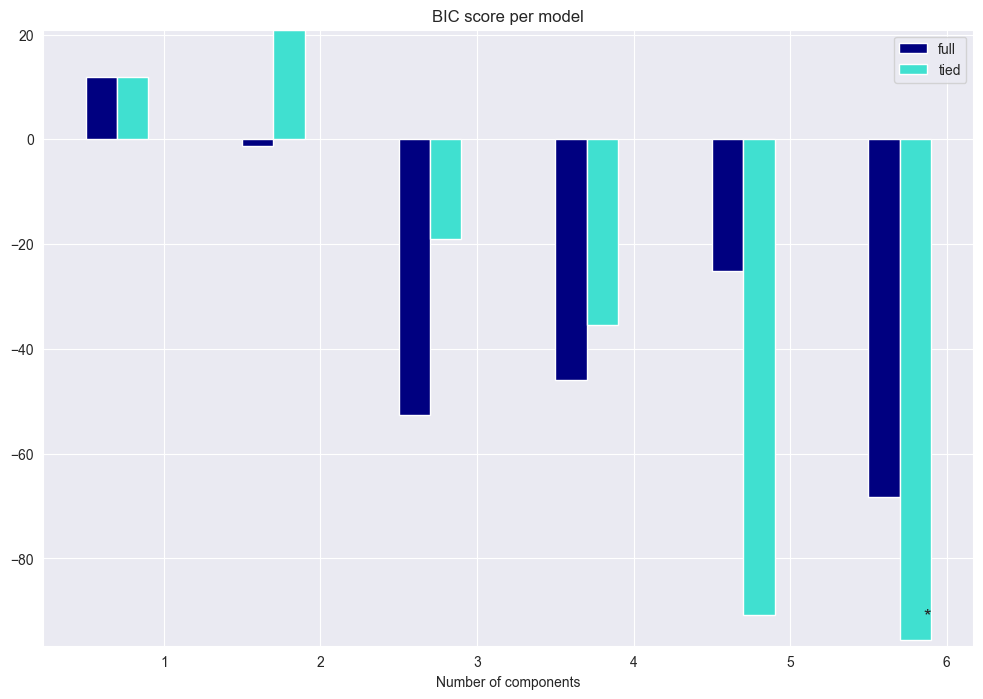

In [108]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
# cv_types = ['spherical', 'tied', 'diag', 'full']
# spherical: các thành phần hiệp phương sai của các phân bố Gaussian là đồng nhất
# tied: các thành phần hiệp phương sai của các phân bố Gaussian là giống nhau
# diag: các thành phần hiệp phương sai của các phân bố Gaussian là khác nhau
# full: các thành phần hiệp phương sai của các phân bố Gaussian là khác nhau và có thể xoay

cv_types = ['full', 'tied']
for cv_type in cv_types:
    for n_components in n_components_range:

        # Fit Gaussian mixture theo phương pháp huấn luyện EM
        gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(X_std)
        bic.append(gmm.bic(X_std))
        # Gán model có BIC scores thấp nhất là model tốt nhất
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise'])
clf = best_gmm
bars = []

# Vẽ biểu đồ BIC scores
plt.figure(figsize=(12, 8))
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
    (i + 1) * len(n_components_range)],width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +.2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)

(iv) Chúng ta vẽ dữ liệu ra dạng trực quan để có thể quan sát.

In [109]:
def _plot_kmean_scatter(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))

    palette = np.array(sns.color_palette("hls", num_classes))
    # vẽ biểu đồ scatter
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40,
    c=palette[labels.astype(np.int)])
    # thêm nhãn cho mỗi cluster
    txts = []
    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"),PathEffects.Normal()])
        txts.append(txt)
    plt.title('t-sne visualization')

Cuối cùng: Gọi và thực hiện 2 phương thức chính: Thực hiện mô hình trộn Gaussian và phương thức hiển
thị dữ liệu ra mặt phẳng 2 chiều để dễ quan sát.

C:\Users\thanhsen\AppData\Local\Temp\ipykernel_13748\70231434.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=palette[labels.astype(np.int)])


(200, 2)


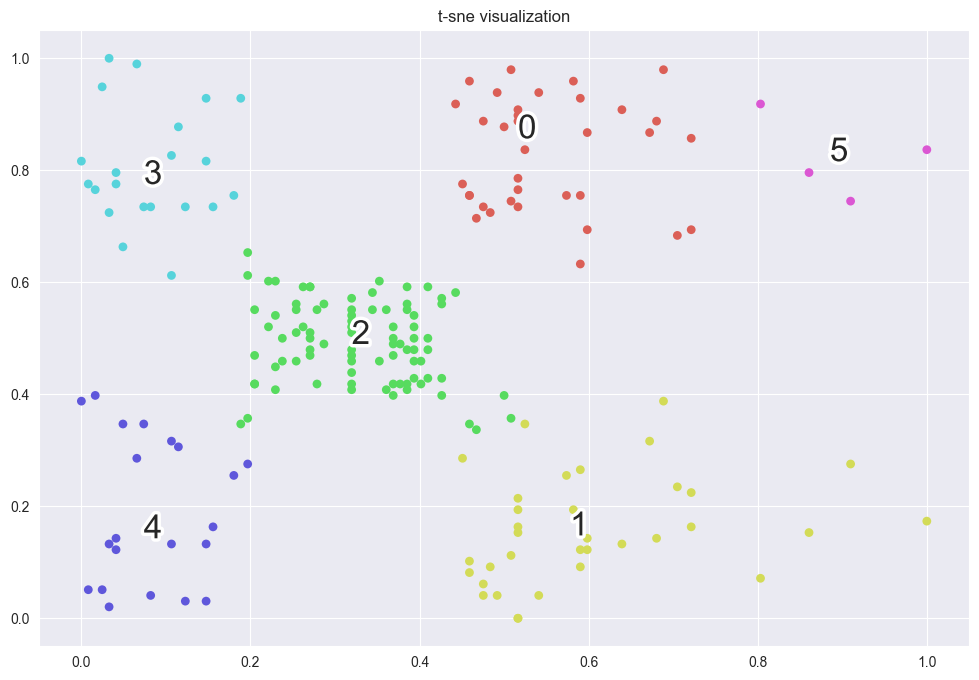

In [110]:
labels = best_gmm.predict(X_std)
_plot_kmean_scatter(X_std, labels)
print(X_std.shape)

# VÍ DỤ 2

In [111]:
data = pd.read_csv("Sales_Transactions_Dataset_Weekly.csv",header=0,index_col=0)
print(data.shape)
data.head()

# Lấy ra thu nhập va điểm shopping
X_sales = data.iloc[:, 54:106].values
print(X_sales[0,51])

(811, 106)
0.39


In [112]:
# Khởi tạo đối tượng mô hình GaussianMixture
gm = GaussianMixture(n_components=52,covariance_type='full',random_state=0)

# Khớp dữ liệu với mô hình
gm.fit(X_sales)
print('means: \n', gm.means_)
print('covariances: \n ', gm.covariances_)

means: 
 [[0.0326087  0.06956522 0.13695652 ... 0.21086957 0.30347826 0.8726087 ]
 [0.4765     0.46225    0.39525    ... 0.45325    0.5025     0.59425   ]
 [0.3175     0.85       0.7175     ... 0.665      0.2475     0.415     ]
 ...
 [0.705      0.73       0.47       ... 0.335      0.445      0.145     ]
 [0.5        0.         0.         ... 0.665      0.665      0.        ]
 [0.         1.         0.         ... 0.         0.         1.        ]]
covariances: 
  [[[ 1.25246295e-02 -2.26843100e-03 -1.74858223e-03 ...  2.02977316e-02
    3.69092628e-03  4.15406427e-03]
  [-2.26843100e-03  3.25529849e-02 -4.31001890e-03 ... -4.23440454e-03
    6.06238185e-03 -7.22495274e-03]
  [-1.74858223e-03 -4.31001890e-03  5.80917372e-02 ... -4.64083176e-03
   -2.72155009e-02  1.22296786e-02]
  ...
  [ 2.02977316e-02 -4.23440454e-03 -4.64083176e-03 ...  9.73828526e-02
    1.28534972e-02  1.99064272e-02]
  [ 3.69092628e-03  6.06238185e-03 -2.72155009e-02 ...  1.28534972e-02
    1.01658467e-01 -1.6509

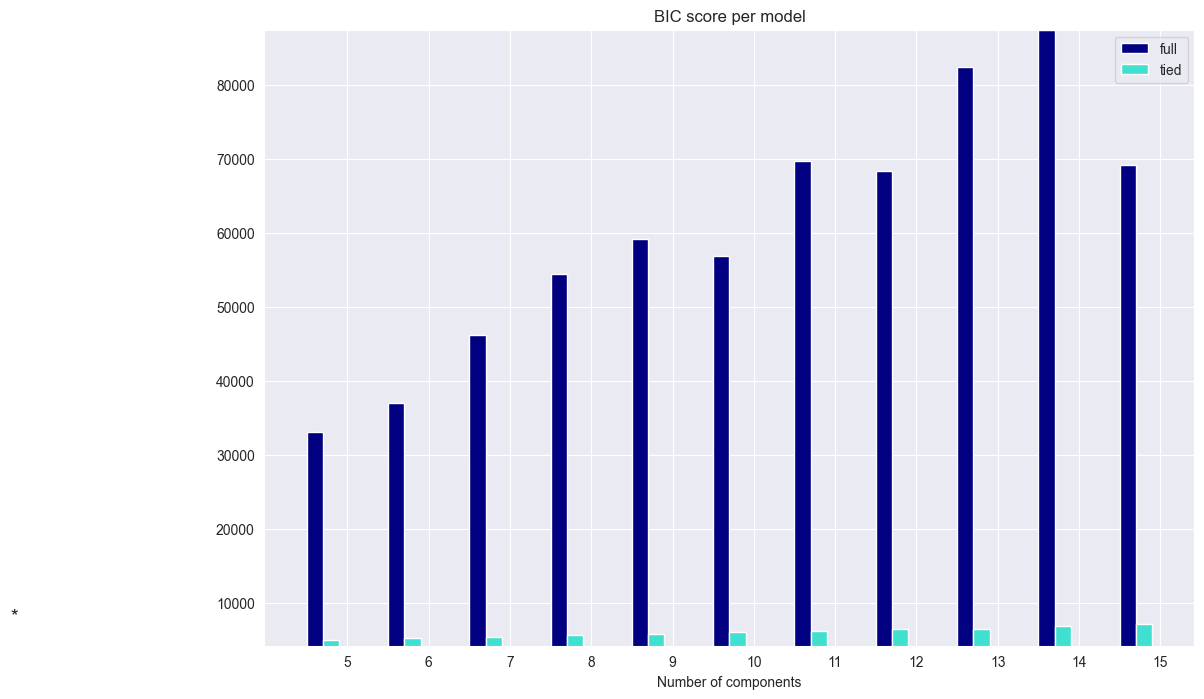

In [113]:
lowest_bic = np.infty
bic = []
n_components_range = range(5, 16)

# cv_types = ['spherical', 'tied', 'diag', 'full']
cv_types = ['full', 'tied']
for cv_type in cv_types:
    for n_components in n_components_range:

        # Fit Gaussian mixture theo phương pháp huấn luyện EM
        gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
        gmm.fit(X_sales)
        bic.append(gmm.bic(X_sales))
        # Gán model có BIC scores thấp nhất là model tốt nhất
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm2 = gmm
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise'])
clf = best_gmm2
bars = []

# Vẽ biểu đồ BIC scores
plt.figure(figsize=(12, 8))
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
    (i + 1) * len(n_components_range)],width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +.2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)

In [114]:
def _plot_kmean_scatter(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))
    print(num_classes)
    print(palette)
    # vẽ biểu đồ scatter
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40,c=palette[labels.astype(np.int64)])
    # thêm nhãn cho mỗi cluster
    txts = []
    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"),PathEffects.Normal()])
        txts.append(txt)
    plt.title('t-sne visualization')

(811, 2)
5
[[0.86   0.3712 0.34  ]
 [0.7248 0.86   0.34  ]
 [0.34   0.86   0.5792]
 [0.34   0.5168 0.86  ]
 [0.7872 0.34   0.86  ]]


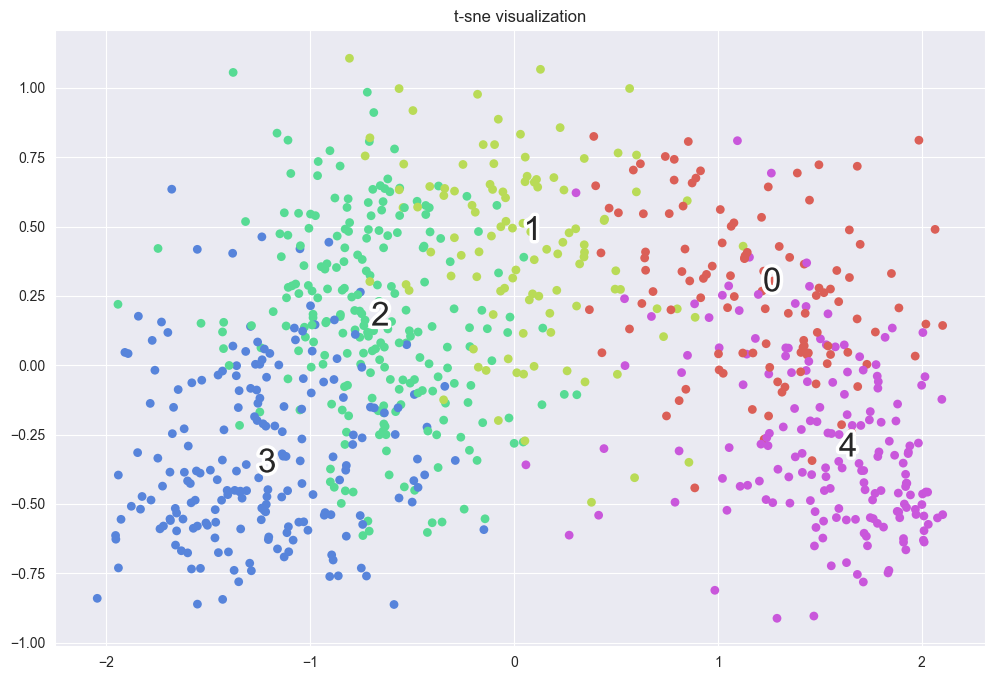

In [117]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sales)
print(X_pca.shape)

labels = best_gmm2.predict(X_sales)
_plot_kmean_scatter(X_pca, labels)